In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Model(nn.Module):
    def __init__(self, in_features = 28, h1 = 8, h2 = 9, out_features = 2):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
df_filipe = pd.read_csv('filipe_films_pandas.csv')
df_letterboxd_dump = pd.read_csv('letterboxd_db_pandas.csv')

In [4]:
df_filipe = df_filipe.drop_duplicates(subset = ['letterboxdId'])
df_letterboxd_dump = df_letterboxd_dump.drop_duplicates(subset = ['letterboxdId'])
filipe_films_set = set(df_filipe['letterboxdId'])
filipe_films_set
print(type(df_letterboxd_dump))
# df_letterboxd_dump.head()

<class 'pandas.core.frame.DataFrame'>


In [5]:
# I'm dropping all the films from filipe's set.
df_letterboxd_dump.shape
for film in filipe_films_set:
   df_letterboxd_dump.drop(df_letterboxd_dump.loc[df_letterboxd_dump['letterboxdId'] == film].index, inplace=True)
df_letterboxd_dump.shape

(11105, 18)

In [6]:
# combining them
df_combined = pd.concat([df_filipe, df_letterboxd_dump])
df_combined.shape

(18733, 18)

In [42]:
# check to make sure they're combined
# j = random.randint(0,18732)
# print(df_combined.iloc[j])

In [7]:
# more cleaning
df_combined = df_combined[df_combined['averageRating'] != 0]
df_combined = df_combined[df_combined['runtime'] != 0]
df_combined = df_combined[df_combined['watchedCount'] != 0]
df_combined = df_combined[df_combined['fansCount'] != 0]
df_combined = df_combined[df_combined['likesCount'] != 0]
df_combined = df_combined[df_combined['reviewsCount'] != 0]
df_combined = df_combined[df_combined['listsCount'] != 0]
# df_combined = df_combined[df_combined['tagline'] != 'No tagline found']
# df_combined = df_combined[df_combined['themes'] != 'No themes found']
df_combined.head(10)

,id,name,letterboxdId,created,updated,releaseYear,averageRating,runtime,genre,themes,watchedCount,fansCount,likesCount,reviewsCount,listsCount,tagline,fullSummary,filipeHasWatched
20,c7e6ed1c-7563-482d-ac63-538dd0e3c5bc,a-man-escaped,42507,2025-02-23 21:11:14.896957,2025-02-23 21:11:14.896957,1956,4.35,101,"{Drama,Thriller}",War and historical adventure Brutal violent pr...,80626,649,27869,10816,52473,Robert Bresson's Prize Winning Film,A captured French Resistance fighter during Wo...,1
71,489ea3e0-e8e2-4df8-aafa-d64dfea99e3b,moving-1993,91951,2025-02-23 21:38:34.643252,2025-02-23 21:38:34.643252,1993,4.12,124,{Drama},No themes found,11369,258,4810,2404,7352,No tagline found,Physically separated from her father and at od...,1
81,aac44544-c5e4-467b-8bea-86023537be9b,the-servant,22135,2025-02-23 21:38:34.642714,2025-02-23 21:38:34.642714,1963,4.12,116,{Drama},Intense violence and sexual transgression Twis...,36478,399,11849,5335,23813,A Terrifyingly Beautiful Motion Picture!,Indolent aristocrat Tony employs competent Bar...,1
90,e25cdf69-d840-458d-a662-ae09d8850487,spider-man-across-the-spider-verse,497631,2025-02-23 21:11:14.769667,2025-02-23 21:11:14.769667,2023,4.43,140,"{ScienceFiction,Animation,Adventure,Action}",Epic heroes Emotional and captivating fantasy ...,3001989,64474,1465496,581389,483114,It's how you wear the mask that matters.,"After reuniting with Gwen Stacy, Brooklyn’s fu...",1
91,8104a496-e152-4441-a501-341353825c82,close-up,32348,2025-02-23 21:11:14.783185,2025-02-23 21:11:14.783185,1990,4.42,98,"{Drama,Crime}",Humanity and the world around us Surreal and t...,140032,4624,58514,22115,72177,No tagline found,This fiction-documentary hybrid uses a sensati...,1
93,9c195cf5-71d0-4478-8ad1-c91254c0c174,late-autumn,38149,2025-02-23 21:39:02.818588,2025-02-23 21:39:02.818588,1960,4.10,128,"{Drama,Comedy}",No themes found,16528,79,4885,1840,10968,No tagline found,A woman and her daughter are each forced to co...,1
95,31025119-c68b-413e-a3c1-79620c2df1d0,le-trou,33012,2025-02-23 21:11:14.737972,2025-02-23 21:11:14.737972,1960,4.48,132,"{Drama,Crime,Thriller}",Crime drugs and gangsters Brutal violent priso...,46109,671,17124,6132,32471,No tagline found,Four prison inmates have been hatching a plan ...,1
109,73452be3-2260-4b73-8947-294bf9241a3f,the-lord-of-the-rings-the-return-of-the-king,51928,2025-02-23 21:11:14.720791,2025-02-23 21:11:14.720791,2003,4.52,201,"{Fantasy,Adventure,Action}",Epic heroes Humanity and the world around us F...,2435567,71927,853852,153535,303438,There can be no triumph without loss. No victo...,As armies mass for a final battle that will de...,1
114,9f510249-dee1-4c63-9cf6-b3c611a191ea,high-and-low,44542,2025-02-23 21:11:14.685746,2025-02-23 21:11:14.685746,1963,4.60,142,"{Mystery,Thriller,Crime,Drama}",Crime drugs and gangsters Suspenseful crime th...,155565,4252,67851,29445,96293,"Stark, intense drama almost beyond belief!",In the midst of an attempt to take over his co...,1
115,d5ce58cb-041e-4476-9bd8-c7657a014f3e,oldboy,51454,2025-02-23 21:11:14.833283,2025-02-23 21:11:14.833283,2003,4.38,120,"{Thriller,Mystery,Drama,Action}",Intense violence and sexual transgression Huma...,1338623,42790,499894,193196,272705,"Laugh, and the world laughs with you. Weep, an...","With no clue how he came to be imprisoned, dru...",1


In [8]:
# add new rows for each genre
# you need to create new columns, one for each genre
# you need to loop through each row in the dataframe and turn each value to zero or one based on if its genre is in the genre array
# you need to drop the genre column
df_combined['Action'] = 0
df_combined['Adventure'] = 0
df_combined['Animation'] = 0
df_combined['Comedy'] = 0
df_combined['Crime'] = 0
df_combined['Documentary'] = 0
df_combined['Drama'] = 0
df_combined['Family'] = 0
df_combined['Fantasy'] = 0
df_combined['History'] = 0
df_combined['Horror'] = 0
df_combined['Music'] = 0
df_combined['Mystery'] = 0
df_combined['Romance'] = 0
df_combined['ScienceFiction'] = 0
df_combined['Thriller'] = 0
df_combined['TVMovie'] = 0
df_combined['War'] = 0
df_combined['Western'] = 0
df_combined['Unknown'] = 0
df_combined.shape

for index, row in df_combined.iterrows():
    for genre in row['genre'].strip('{}').split(','):
        df_combined.at[index, genre] = 1

In [9]:
X = df_combined.drop(columns = ['id','name','letterboxdId','created','updated','themes','tagline','fullSummary', 'genre', 'filipeHasWatched'])
X = X.drop(X.columns[-1], axis=1)
y = df_combined['filipeHasWatched']
# convert to numpy arrays
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

In [10]:
# Instantiate model stuff here
torch.manual_seed(41)
model = Model()
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [11]:
# Train the model
epochs = 400
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f'Epoch: {i}, Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 0, Loss: 344.8253479003906
Epoch: 10, Loss: 260.8528137207031
Epoch: 20, Loss: 195.54808044433594
Epoch: 30, Loss: 145.93319702148438
Epoch: 40, Loss: 106.88725280761719
Epoch: 50, Loss: 77.03084564208984
Epoch: 60, Loss: 54.820220947265625
Epoch: 70, Loss: 38.89796829223633
Epoch: 80, Loss: 27.574731826782227
Epoch: 90, Loss: 19.343719482421875
Epoch: 100, Loss: 13.323241233825684
Epoch: 110, Loss: 8.627866744995117
Epoch: 120, Loss: 4.625986099243164
Epoch: 130, Loss: 1.0411182641983032
Epoch: 140, Loss: 1.246544599533081
Epoch: 150, Loss: 1.0916380882263184
Epoch: 160, Loss: 0.9312714338302612
Epoch: 170, Loss: 0.8370841145515442
Epoch: 180, Loss: 0.9020363688468933
Epoch: 190, Loss: 0.7971636056900024
Epoch: 200, Loss: 0.7379494309425354
Epoch: 210, Loss: 0.74351567029953
Epoch: 220, Loss: 0.7552642822265625
Epoch: 230, Loss: 0.6938435435295105
Epoch: 240, Loss: 0.7025327682495117
Epoch: 250, Loss: 0.683181643486023
Epoch: 260, Loss: 0.7026748657226562
Epoch: 270, Loss: 0.69

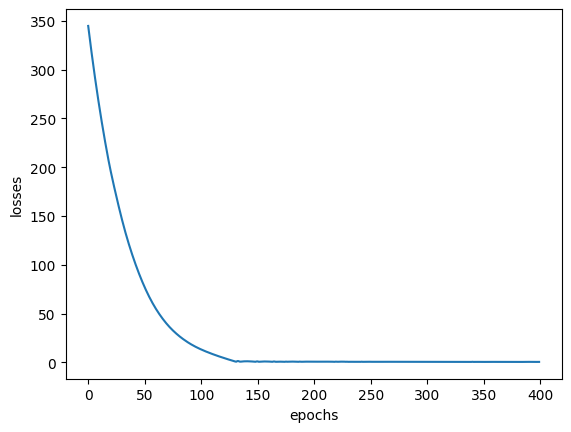

In [12]:
plt.plot(range(epochs),losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.savefig('first_training_loss_results.png', bbox_inches='tight')

In [13]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    accuracy = criterion(y_eval, y_test)

accuracy

tensor(0.5745)

In [77]:
torch.save(model.state_dict(), 'filipe_has_watched_model.pt')